<a name="title"></a>

### ВНИМАНИЕ ! По своей глупости я, после применения метода Kmeans не сохранил данные по кластерам и выводы по отдельным кластерам могут отличаться ! (после перезапуска ядра Юпитера, нумерация кластеров сбивается)

# Задачи исследования


# [Шаг 1. Загрузите данные](#stage_1)
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 

#### Набор данных включает следующие поля:
- 'Churn' — факт оттока в текущем месяце;

#### Текущие поля в датасете:
Данные пользователя за предыдущий до проверки факта оттока месяц:
- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент в таком случае фитнес-центр хранит информацию о работодателе клиента)
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

#### Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

## Путь к файлу
- Путь к файлу: /datasets/gym_churn.csv



# [Шаг 2. Проведите исследовательский анализ данных (EDA)](#stage_2)

- [Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe())](#stage_2_1)
- [Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())](#stage_2_2)
- [Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)](#stage_2_3)
- [Постройте матрицу корреляций и отобразите её](#stage_2_4)



# [Шаг 3. Постройте модель прогнозирования оттока пользователей](#stage_3)

Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:

- [Разбейте данные на обучающую и валидационную выборку функцией train_test_split()](#stage_3_1)
- [Обучите модель на train-выборке любыми двумя способами: логистической регрессией и случайным лесом](#stage_3_2)
- [Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?](#stage_3_3)



# [Шаг 4. Сделайте кластеризацию пользователей](#stage_4)

Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (пользователей):

- [Стандартизируйте данные](#stage_4_1)
- [Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.](#stage_4_2)
- [Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).](#stage_4_3)
- [Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?](#stage_4_4)
- [Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?](#stage_4_5)
- [Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?](#stage_4_6)



# [Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами](#stage_5)

Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с пользователями и их удержания.
Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

<a id = 'stage_1'></a>

# Шаг 1. Загрузите данные

[к оглавлению](#title)

In [2]:
data = pd.read_csv('gym_churn_us.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
data.columns = [str(i).lower() for i in data.columns]
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [5]:
data.duplicated().sum() # Сколько дубликатов

0

---

<a id = 'stage_2'></a>

# Шаг 2. Проведите исследовательский анализ данных (EDA)

[к оглавлению](#title)

---

<a id = 'stage_2_1'></a>

#### 2.1. Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe())

[к оглавлению](#title)

In [6]:
data.isnull().any() # Отсутствующих признаков нет

gender                               False
near_location                        False
partner                              False
promo_friends                        False
phone                                False
contract_period                      False
group_visits                         False
age                                  False
avg_additional_charges_total         False
month_to_end_contract                False
lifetime                             False
avg_class_frequency_total            False
avg_class_frequency_current_month    False
churn                                False
dtype: bool

In [7]:
data.describe().loc[['mean', 'std'], :]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521


- выручка от других услуг колеблется
- посещения в неделю 1-3 в среднем

---

<a id = 'stage_2_2'></a>

#### 2.2. Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())

[к оглавлению](#title)

In [8]:
churn_data = data.groupby('churn').mean()
churn_data

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


- в среднем траты на другие услуги у оттока меньше 
- у оттока заканчиваются абонементы (остается 1,5 мес.)
- средняя частота посещения в неделю схожа (чуть меньше у оттока)
- у оттока время с мометна первого обращения значительно меньше

---

<a id = 'stage_2_3'></a>

#### 2.3. Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

[к оглавлению](#title)

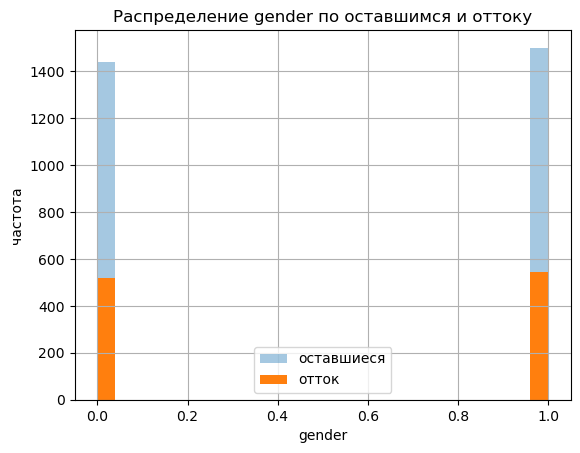

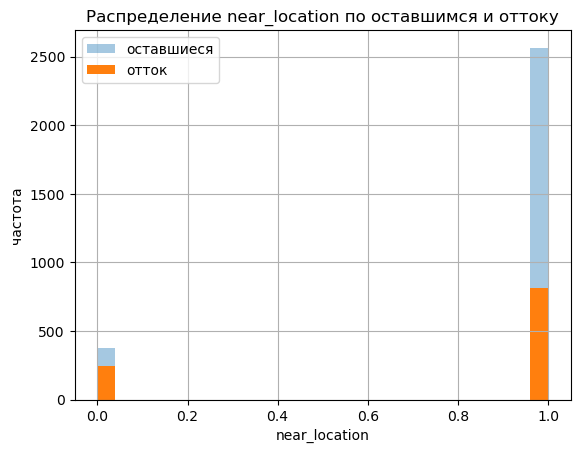

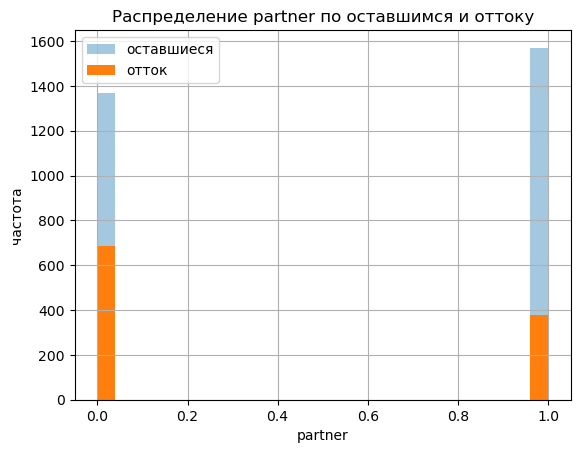

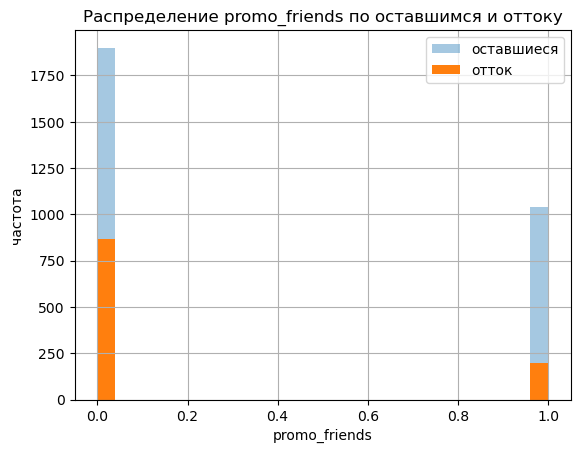

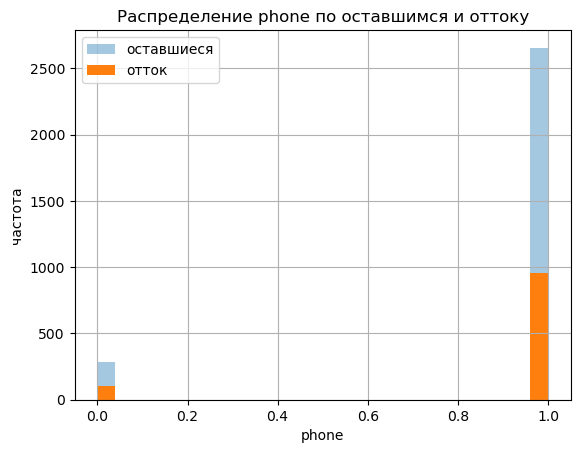

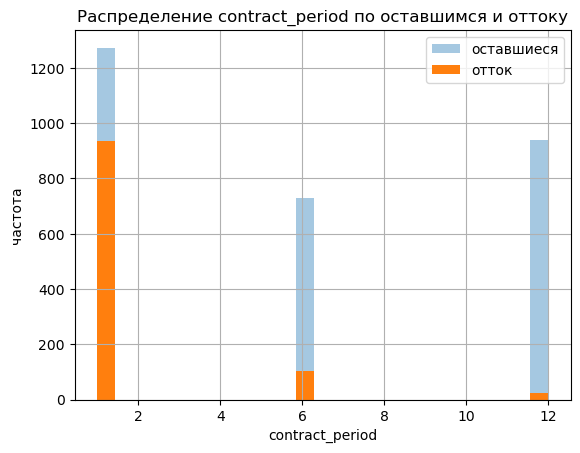

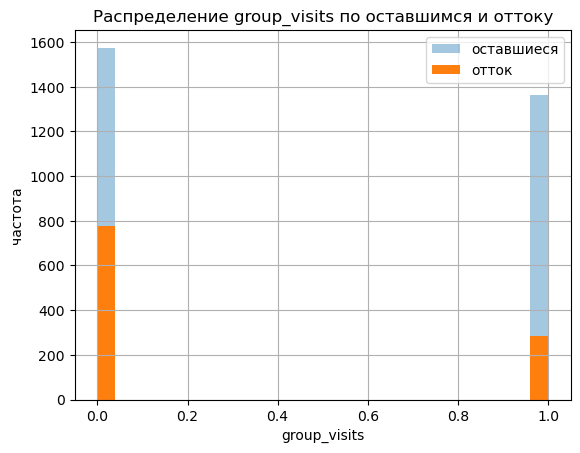

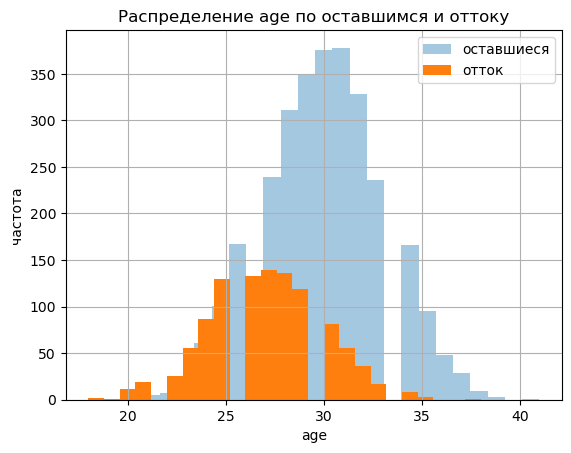

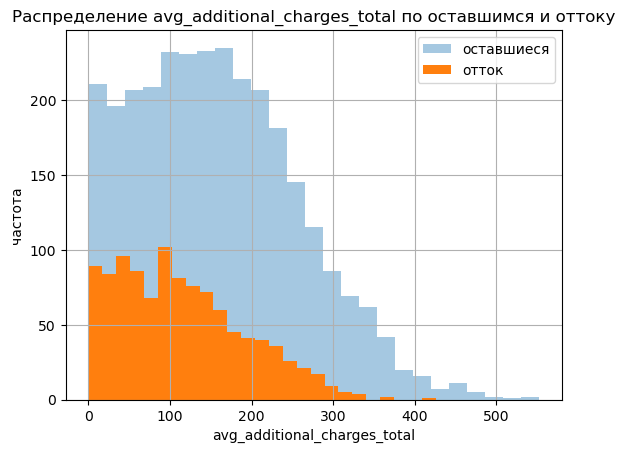

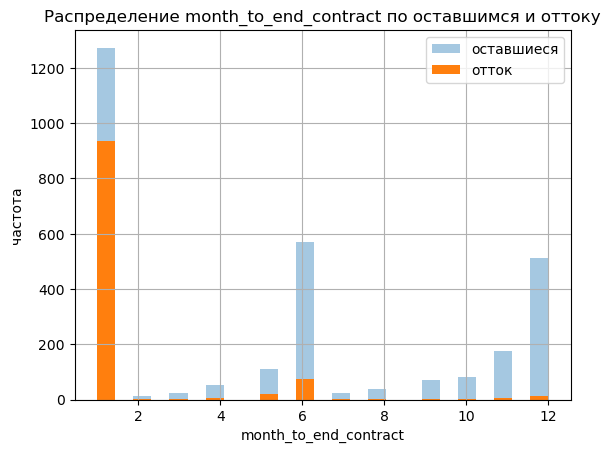

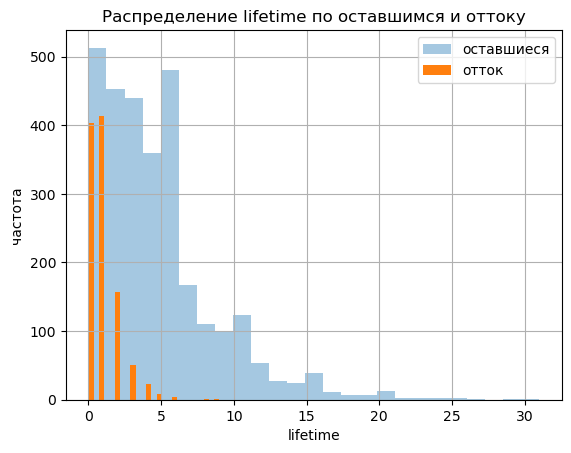

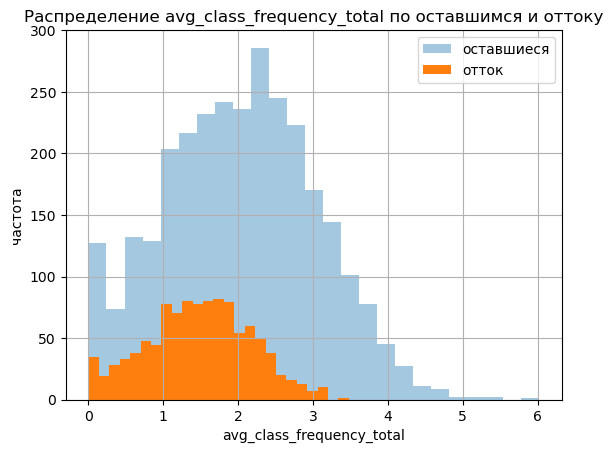

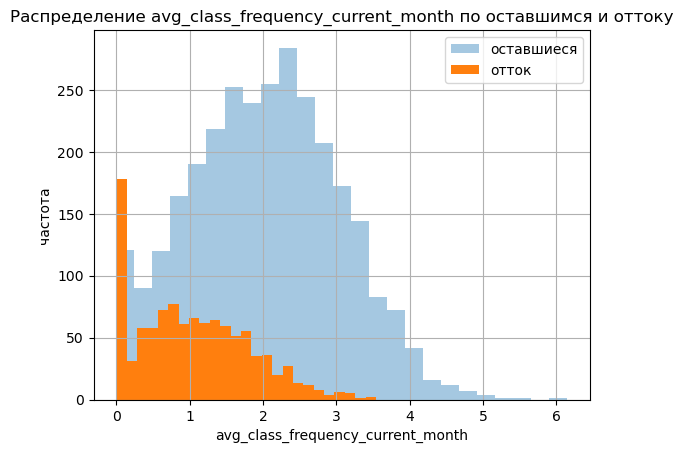

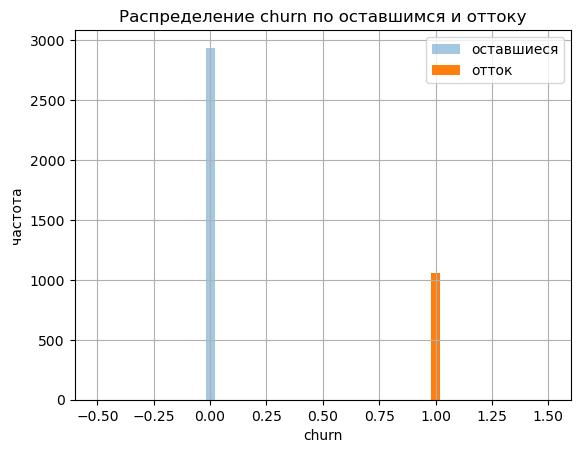

In [9]:
for column in data.columns:    
    data[data['churn'] == 0][column].plot(kind = 'hist',
                                          bins = 25,
                                          alpha = 0.4,
                                          label = 'оставшиеся')
    data[data['churn'] == 1][column].plot(kind = 'hist',
                                          bins = 25,
                                          label = 'отток')
    plt.legend()
    plt.xlabel(column)
    plt.ylabel('частота')
    plt.title(f'Распределение {column} по оставшимся и оттоку')
    plt.grid()
    plt.show()

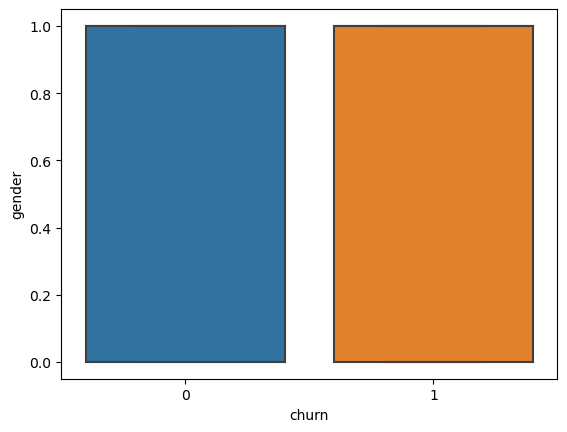

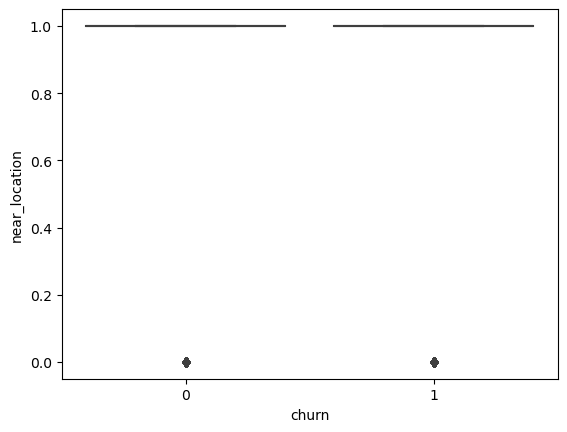

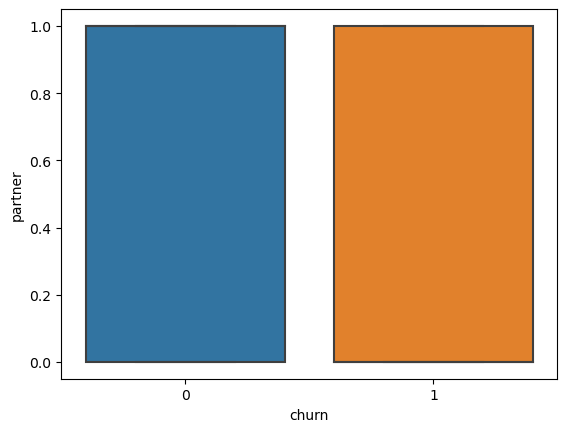

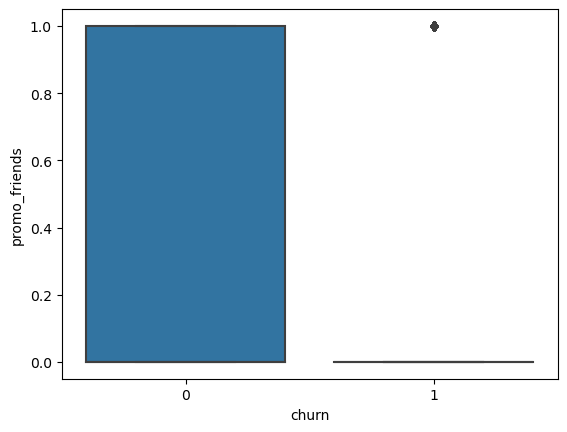

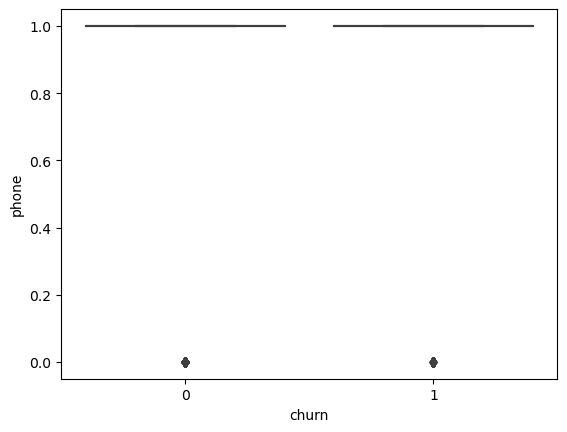

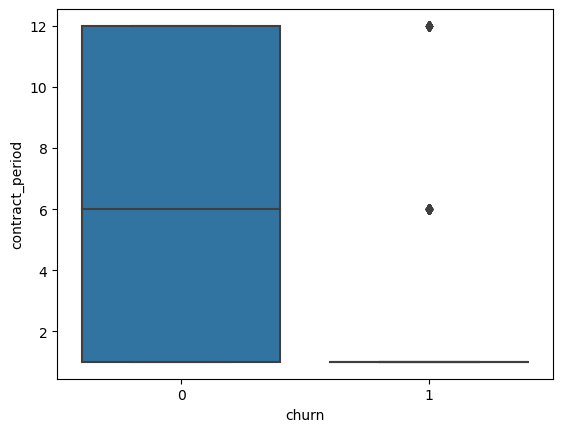

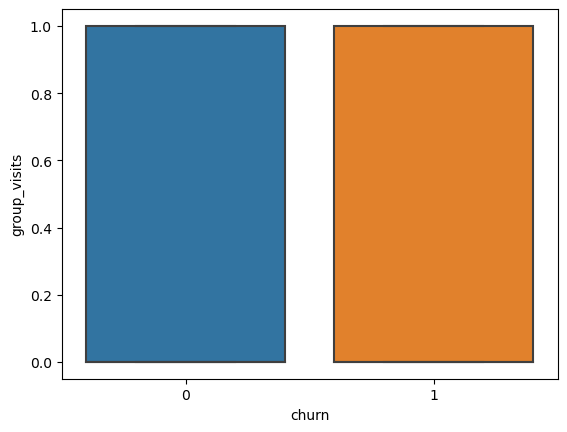

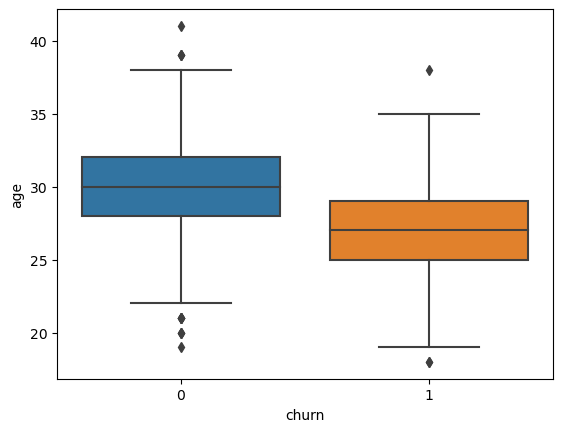

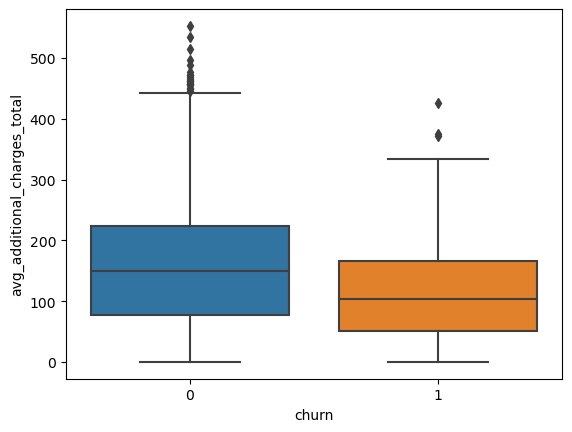

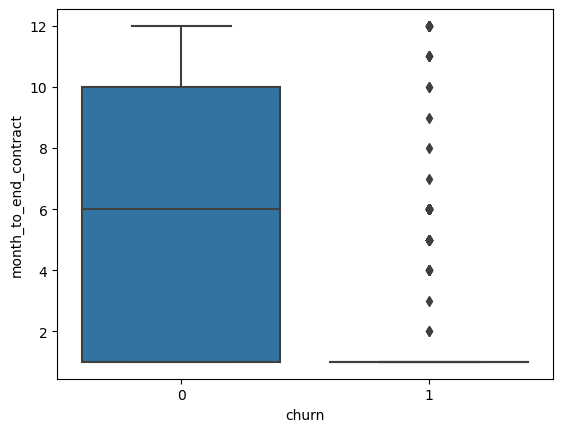

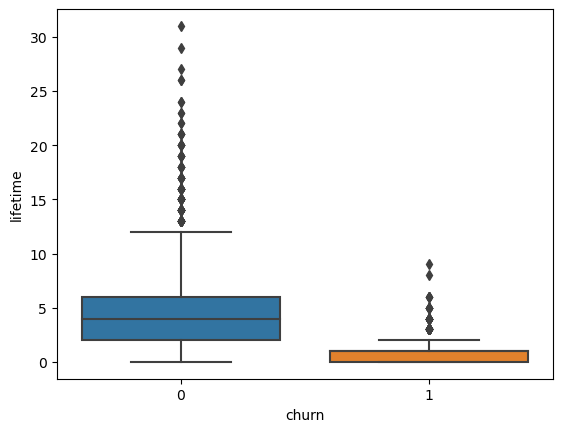

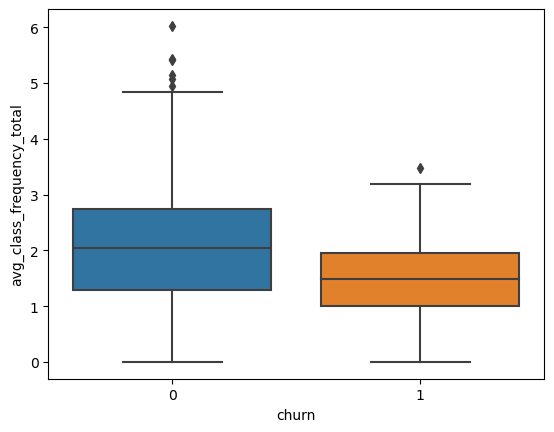

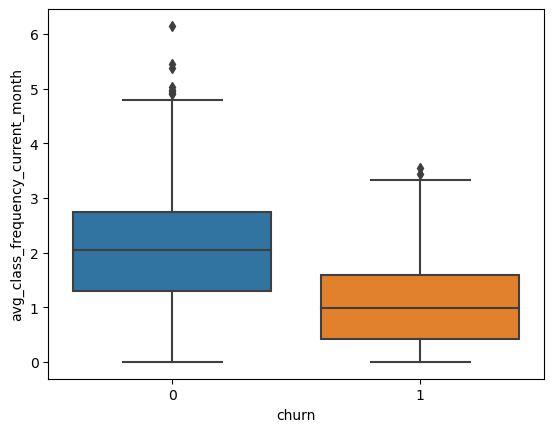

In [10]:
for column in data.columns[:-1]:
    sns.boxplot(data = data,
                x = 'churn',
                y = column)
    plt.show()


1) больше всего посетителей проживает около фитнес-центра (доля оттока "далеко проживающих", больше, чем "близко проживающих")
2) отток женщин и мужчин одинаковы (не зависит от пола)
3) отток непартнеров больше, чем партнеров
4) отток клиентов по акции "друг" гораздо меньше, чем не по этой акции
5) отток клиентов с 1 месячным абонементом огромен, по сравнению с 6 и 12 месяцами
6) доля оттока клиентов, посещающих групповые занятия меньше чем не посещающих
7) средний возраст оттока - 27, оставшихся - 30
8) выручка от сторонней деятельности, у оттока и оставшихся примерно сопоставима (пропорционалльна количесвту)
9) доля оттока клиентов с остатком 1 месяц на абонементе - огромна
10) среднее кол-во посещений в неделю у оттока - 1,5, у оставщихся - 2
11) у оттокак много непосещений за предыдущий месяц

---

<a id = 'stage_2_4'></a>

#### 2.4. Постройте матрицу корреляций и отобразите её

[к оглавлению](#title)

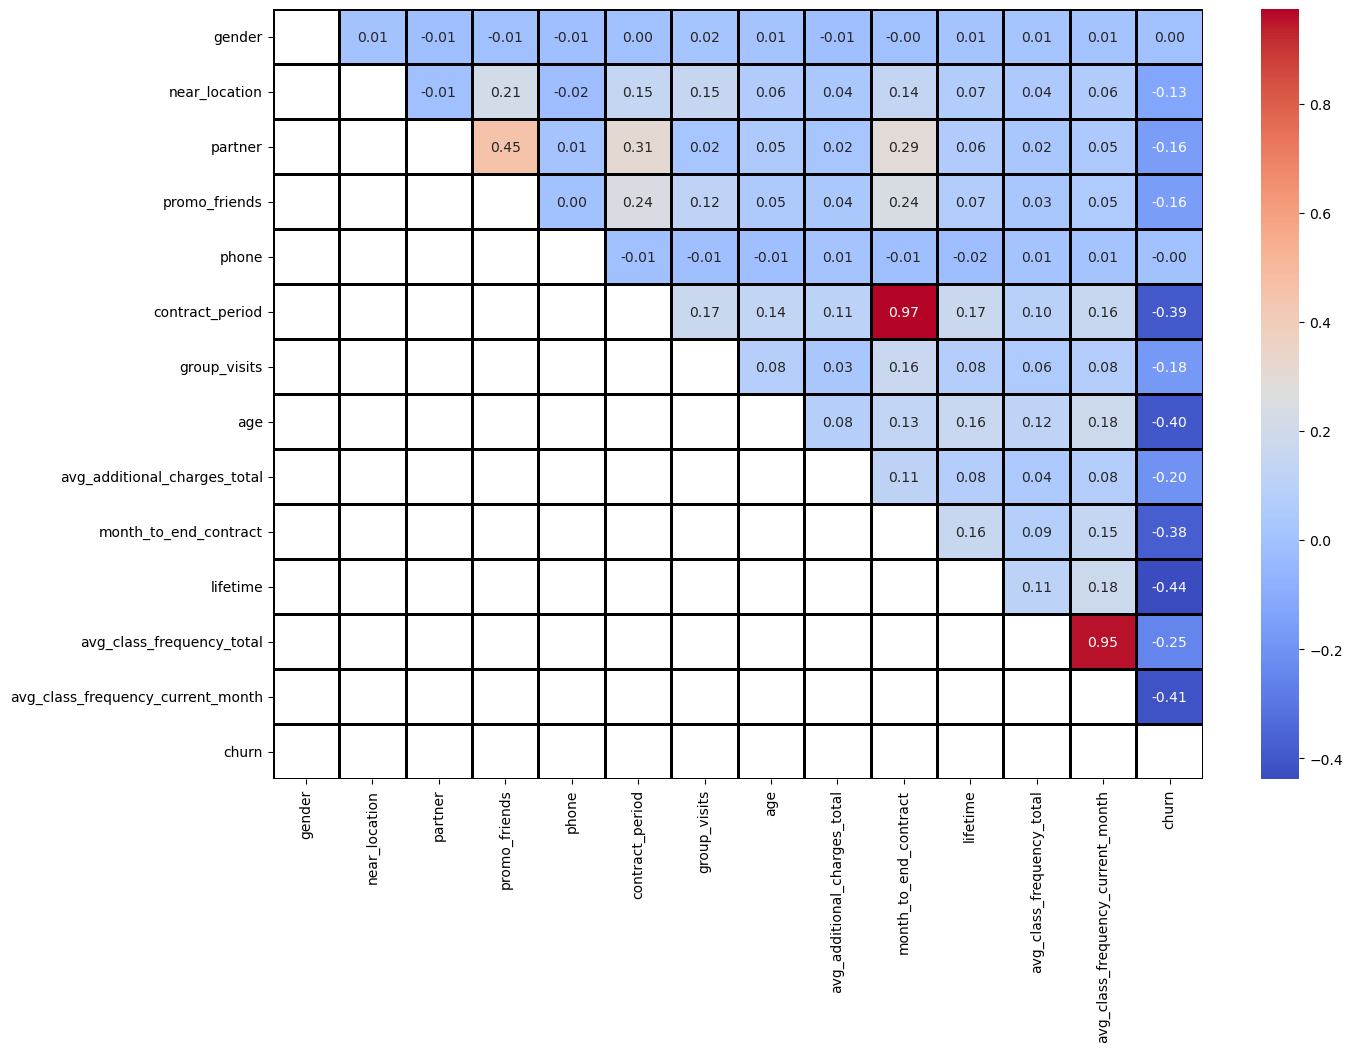

In [11]:
mask = np.tril(data.corr()) # маска треугольного вида матрицы

plt.figure(figsize = (15, 10))

sns.heatmap(data.corr(),
            annot = True, # Подписывать числа
            fmt = '0.2f', # округление чисел до сотых
            cmap = 'coolwarm', # цветовая гамма (также 'PiYG' - очень хорошая)
            linewidths=1,   # добавление рамок для ячеек
            linecolor='black',  # цвет этих рамок
            mask = mask)    # добавление маски (треугольник)
plt.show()

- сильная положительная корреляция длительности текущего абонемента и срока до окончания текущего абонемента (тут так получилось, потому что большинство клиентов берет абонемент на 1 месяц и замеры, т.е. data - одного месяца - текущего --> ПОКАЗАТЕЛЬ СОМНИТЕЛЬНЫЙ)
- также сильная корреляция у средних частот посещений в неделю (предыдущий месяц) и средней частоты посещений в неделю (за все время действия абонемента) --> это говорит о последовательности (предсказуемости) клиентского поведения - много ходит в неделю - много ходит впринципе (за весь абонемент)

---

<a id = 'stage_3'></a>

# Шаг 3. Постройте модель прогнозирования оттока пользователей

[к оглавлению](#title)

---

<a id = 'stage_3_1'></a>

#### 3.1. Разбейте данные на обучающую и валидационную выборку функцией train_test_split()

[к оглавлению](#title)

In [12]:
from sklearn.model_selection import train_test_split


X = data.drop('churn', axis = 1)    # Таблица признаков
y = data['churn']   # таблица меток

# разбиваем на 80%-ю тренировачную выборку, и 20% проверочную
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0)

---

<a id = 'stage_3_2'></a>

#### 3.2. Обучите модель на train-выборке любыми двумя способами: логистической регрессией и случайным лесом.

[к оглавлению](#title)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Сначала поробуем создать модели и посмотреть метрики, далее воспользуемся GridSearch для отбора гиперпараметров
# Логистическая регрессия
log_reg = LogisticRegression(max_iter = 1000,
                             solver = 'lbfgs')

log_reg.fit(X_train, y_train)

def score_models(model):
    
    y_predict = model.predict(X_test)

    accuracy = metrics.accuracy_score(y_true = y_test,
                                      y_pred = y_predict)
    precision = metrics.precision_score(y_true=y_test,
                                        y_pred=y_predict)

    recall = metrics.recall_score(y_true = y_test,
                                  y_pred=y_predict)
    
    print('Точность: {:.2f}'.format(accuracy))
    print('Прецизионность: {:.2f}'.format(precision))
    print('Полнота: {:.2f}'.format(recall))

    data_exit = pd.DataFrame({'Название модели': model,
                              'Точность (accuracy)': accuracy,
                              'Прецизионность (precision)': precision,
                              'Полнота (recall)': recall},
                              index = np.arange(1))
    return data_exit.round(3)

data_1 = score_models(log_reg)
data_1


Точность: 0.92
Прецизионность: 0.86
Полнота: 0.83


,Название модели,Точность (accuracy),Прецизионность (precision),Полнота (recall)
0,LogisticRegression(max_iter=1000),0.924,0.859,0.828


In [14]:
# Попробуем стандартизацию признаков + логистическая регрессия
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(),
                         LogisticRegression(max_iter = 1000,
                                            solver = 'lbfgs'))

pipeline.fit(X_train, y_train)

data_2 = score_models(pipeline)
data_scores = pd.concat([data_1, data_2], axis = 0)

pd.set_option('display.max_colwidth', None) # чтобы увидеть полную строку модели с гиперпараметрами
data_scores

Точность: 0.92
Прецизионность: 0.85
Полнота: 0.83


,Название модели,Точность (accuracy),Прецизионность (precision),Полнота (recall)
0,LogisticRegression(max_iter=1000),0.924,0.859,0.828
0,"(StandardScaler(), LogisticRegression(max_iter=1000))",0.922,0.854,0.828


In [15]:
# Случайный лес без стандартизации признаков
from sklearn.ensemble import RandomForestClassifier


randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_predict_2 = randomforest.predict(X_test)

accuracy = metrics.accuracy_score(y_true = y_test,
                                  y_pred = y_predict_2)
precision = metrics.precision_score(y_true=y_test,
                                    y_pred=y_predict_2)

recall = metrics.recall_score(y_true = y_test,
                              y_pred=y_predict_2)
    
print('Точность: {:.2f}'.format(accuracy))
print('Прецизионность: {:.2f}'.format(precision))
print('Полнота: {:.2f}'.format(recall))

data_3 = pd.DataFrame({'Название модели': 'RandomForestClassifier(100)',
                       'Точность (accuracy)': accuracy,
                       'Прецизионность (precision)': precision,
                       'Полнота (recall)': recall},
                       index = np.arange(1))
data_scores = pd.concat([data_scores, data_3], axis = 0)
data_scores

Точность: 0.91
Прецизионность: 0.84
Полнота: 0.81


,Название модели,Точность (accuracy),Прецизионность (precision),Полнота (recall)
0,LogisticRegression(max_iter=1000),0.92400,0.859000,0.828000
0,"(StandardScaler(), LogisticRegression(max_iter=1000))",0.92200,0.854000,0.828000
0,RandomForestClassifier(100),0.91375,0.837696,0.808081


In [16]:
# Случайный лес + стандартизация признаков

pipe_rf = make_pipeline(StandardScaler(),
                        RandomForestClassifier())
pipe_rf.fit(X_train, y_train)
y_predict_3 = pipe_rf.predict(X_test)

print('Точность: {:.2f}'.format(metrics.accuracy_score(y_true = y_test,
                                                       y_pred = y_predict_3)))
print('Прецизионность: {:.2f}'.format(metrics.precision_score(y_true=y_test,
                                                              y_pred=y_predict_3)))
print('Полнота: {:.2f}'.format(metrics.recall_score(y_true = y_test,
                                                    y_pred = y_predict_3)))

Точность: 0.91
Прецизионность: 0.84
Полнота: 0.79


In [17]:
# Отбор лучшей модели RandomForestClassifier
'''from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", StandardScaler()),
                 ("rf", RandomForestClassifier())])


n_estimators = np.arange(100, 1100, 100)
criterion = ['gini', 'entropy', 'log_loss']
max_depth = np.arange(0, 10)

param_grid = {

            'rf__n_estimators': n_estimators,
            'rf__criterion':criterion,
            'rf__max_depth':max_depth
}



grid_pipeline = GridSearchCV(pipe,
                             param_grid=param_grid,
                             cv = 5,
                             verbose=0)

best_rf_model = grid_pipeline.fit(X_train,
                                  y_train)
best_rf_model.best_params_'''

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.pipeline import Pipeline\n\npipe = Pipeline([("scaler", StandardScaler()),\n                 ("rf", RandomForestClassifier())])\n\n\nn_estimators = np.arange(100, 1100, 100)\ncriterion = [\'gini\', \'entropy\', \'log_loss\']\nmax_depth = np.arange(0, 10)\n\nparam_grid = {\n\n            \'rf__n_estimators\': n_estimators,\n            \'rf__criterion\':criterion,\n            \'rf__max_depth\':max_depth\n}\n\n\n\ngrid_pipeline = GridSearchCV(pipe,\n                             param_grid=param_grid,\n                             cv = 5,\n                             verbose=0)\n\nbest_rf_model = grid_pipeline.fit(X_train,\n                                  y_train)\nbest_rf_model.best_params_'

In [18]:
# Сохраним модель
import joblib
'''rf_model_best = grid_pipeline.best_estimator_
joblib.dump(rf_model_best, 'random_forest_best.jolib')'''

loaded_rf = joblib.load('random_forest_best.jolib')

print(score_models(loaded_rf))

Точность: 0.91
Прецизионность: 0.82
Полнота: 0.78
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Как видим, модель RandomForest даже с лучшими параметрами уступает простейшей модели логистической регрессии

---

<a id = 'stage_4'></a>

# Шаг 4. Сделайте кластеризацию пользователей

[к оглавлению](#title)

---

<a id = 'stage_4_1'></a>

#### 4.1. Стандартизируйте данные.

[к оглавлению](#title)

In [19]:
# Дроп колонки churn
data_step_4 = data.drop('churn', axis=1)

# Т.к. StandartScaler() дропает шапку таблицы, превращая датафрейм в матрицу --> запомним названия колонок
step_4_columns = data_step_4.columns
data_step_4.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078


In [20]:
from sklearn.preprocessing import StandardScaler

# Стандартизация
data_step_4 = StandardScaler().fit_transform(data_step_4)
data_step_4 = pd.DataFrame(data_step_4, columns = step_4_columns)
data_step_4.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0.979706,0.427881,1.026861,1.497161,-3.059852,0.289890,1.194032,-0.056554,-1.377531,0.161605,-0.193329,-1.911920,-1.678472
1,-1.020715,0.427881,-0.973842,-0.667931,0.326813,1.608822,1.194032,0.557327,-0.350213,1.831941,0.873680,0.045176,0.136014
2,-1.020715,0.427881,1.026861,-0.667931,0.326813,-0.809219,-0.837498,-0.363494,-0.181592,-0.792873,-0.460081,-0.020493,-0.029019
3,-1.020715,0.427881,1.026861,1.497161,0.326813,1.608822,1.194032,1.171208,-0.874722,1.831941,-0.460081,1.364655,1.510450
4,0.979706,0.427881,1.026861,1.497161,0.326813,-0.809219,-0.837498,-0.977375,0.533700,-0.792873,-0.193329,-0.787076,-0.614542


---

<a id = 'stage_4_2'></a>

#### 4.2. Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. На основании полученного графика предположите, какое количество кластеров можно выделить.

[к оглавлению](#title)

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage


# матрица расстояний
link_matrix = \
linkage(data_step_4,
        method='ward')

link_matrix

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

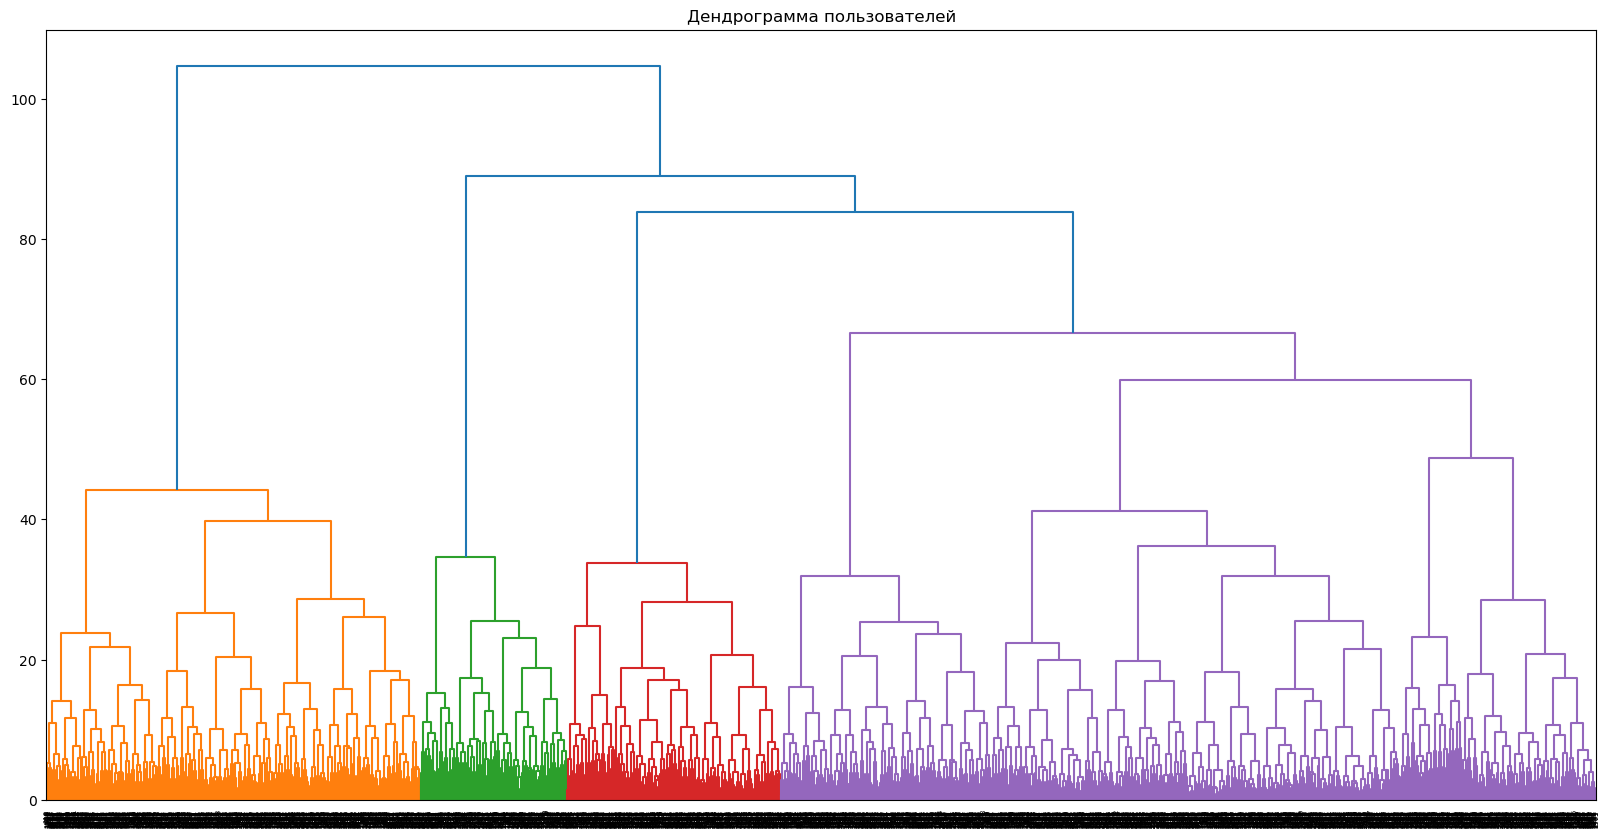

In [22]:
plt.figure(figsize=(20, 10))
dendrogram(link_matrix,
           orientation='top')
plt.title('Дендрограмма пользователей')
plt.show()

На основе дедрограммы предположим, что кластеров 5

---

<a id = 'stage_4_3'></a>

#### 4.3. Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов.

[к оглавлению](#title)

In [23]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=5)
metki = k_means.fit_predict(data_step_4)
data['number_of_cluster'] = metki
data['number_of_cluster'].value_counts()

c:\Users\oudel\anaconda3\envs\cringe_player_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


number_of_cluster
3    1249
2    1013
1     848
0     505
4     385
Name: count, dtype: int64

In [24]:
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,number_of_cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,2
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


---

<a id = 'stage_4_4'></a>

#### 4.4. Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

[к оглавлению](#title)

In [25]:
data.groupby('number_of_cluster').mean().T

number_of_cluster,0,1,2,3,4
gender,0.495050,0.563679,0.500494,0.484388,0.522078
near_location,0.000000,0.975236,0.960513,1.000000,0.862338
partner,0.463366,0.350236,0.782823,0.353883,0.470130
promo_friends,0.079208,0.228774,0.574531,0.240192,0.306494
phone,1.000000,0.998821,1.000000,1.000000,0.000000
contract_period,2.374257,2.599057,10.886476,1.962370,4.787013
group_visits,0.217822,0.471698,0.540967,0.341873,0.425974
age,28.465347,30.086085,29.985192,28.176942,29.301299
avg_additional_charges_total,135.224414,161.568158,160.977583,131.291266,143.957664
month_to_end_contract,2.219802,2.400943,9.946693,1.869496,4.475325


Дропнем неважные признаки (те, которые схожи у всех кластеров): гендр, телефон, возраст 

In [26]:
data.groupby('number_of_cluster').mean().drop(['gender','phone','age'], axis = 1).T.round(3)

number_of_cluster,0,1,2,3,4
near_location,0.000,0.975,0.961,1.000,0.862
partner,0.463,0.350,0.783,0.354,0.470
promo_friends,0.079,0.229,0.575,0.240,0.306
contract_period,2.374,2.599,10.886,1.962,4.787
group_visits,0.218,0.472,0.541,0.342,0.426
avg_additional_charges_total,135.224,161.568,160.978,131.291,143.958
month_to_end_contract,2.220,2.401,9.947,1.869,4.475
lifetime,2.810,4.932,4.721,2.406,3.925
avg_class_frequency_total,1.656,2.834,1.993,1.238,1.847
avg_class_frequency_current_month,1.473,2.830,1.986,1.002,1.716


в кластерах 2 и 3 показатели оттока ниже чем в остальных. Посомтрим, на этих данных что характерно для таких кластеров:

#### Высшие показатели:

- средняя частота посещений в неделю (за пред. месяц)
- средняя частота посещений в неделю (за все время действия абонемента)
- время с момента первого обращения в фитнесс-центр
- суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон (это связанно с бОльшим кол-во посещений у этих кластеров)
- групповые занятия
- близкое расположение фитнесс-центра к месту проживания



#### Показатели, которые сильно расходятся у кластеров 2 и 4 (собственно признаки, по которым это разные кластеры):

- срок до окончания текущего действующего абонемента (в месяцах) (у 2-го кластера эта цифра в 4 раза больше чем у 3-го)
- длительность текущего действующего абонемента ( у 2-го кластера этот показатель в 5 раз больше )
- факт первоначальной записи в рамках акции «приведи друга»

---

<a id = 'stage_4_5'></a>

#### 4.5. Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

[к оглавлению](#title)

In [27]:
# Построим распределение категориальных признаков
data_types = data.dtypes.reset_index().rename({0:'type', 'index': 'priznak'}, axis=1)
categorial_priznak = data_types[(data_types['type'] == 'int64')]['priznak']
categorial_priznak

0              gender
1       near_location
2             partner
3       promo_friends
4               phone
5     contract_period
6        group_visits
7                 age
10           lifetime
13              churn
Name: priznak, dtype: object

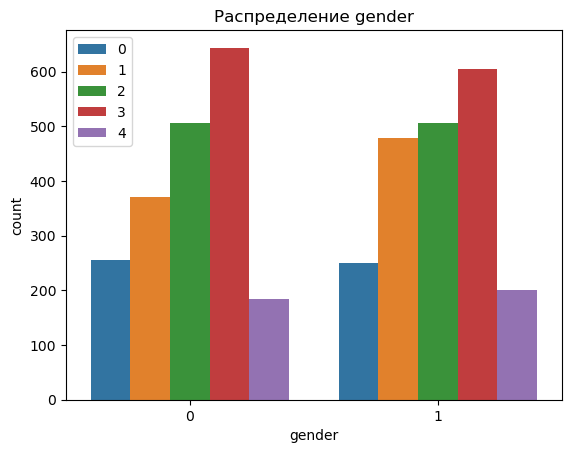

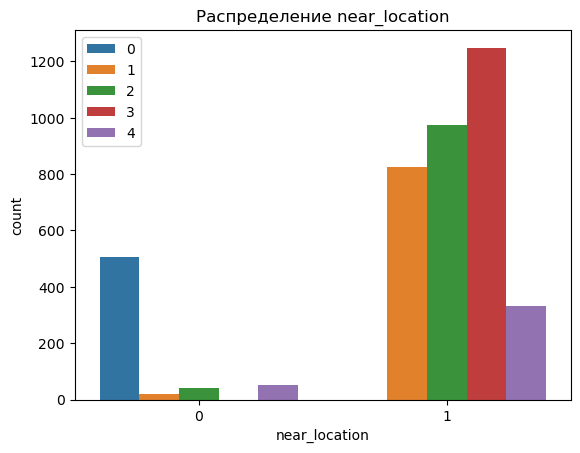

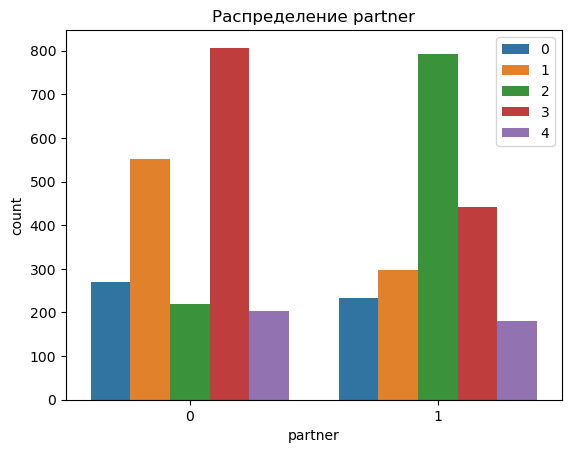

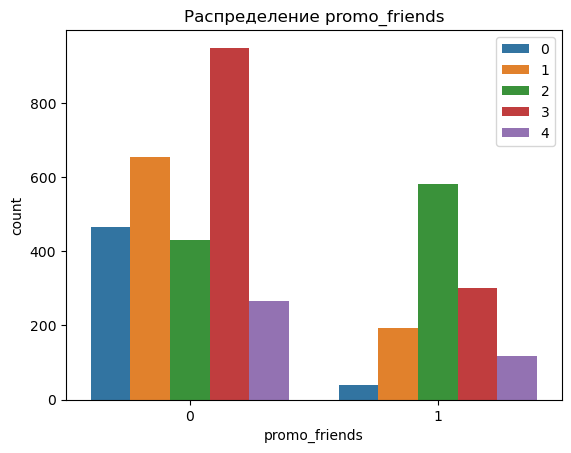

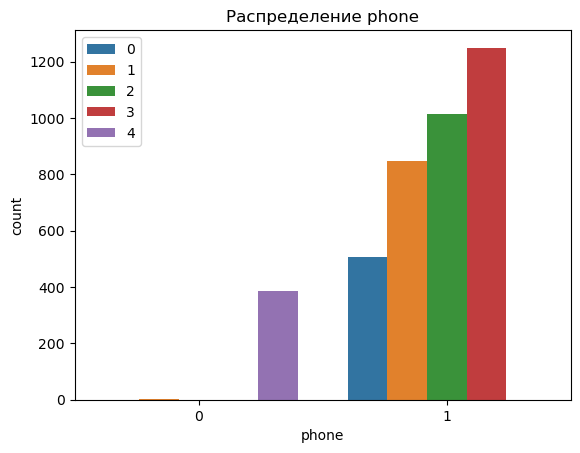

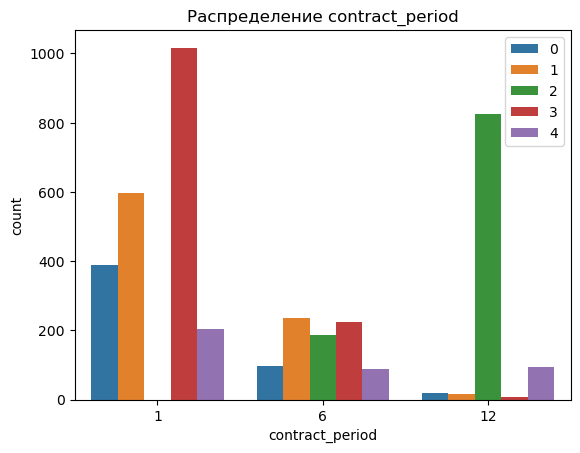

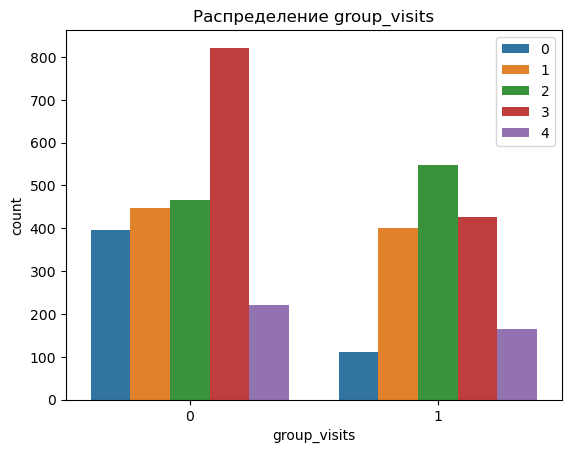

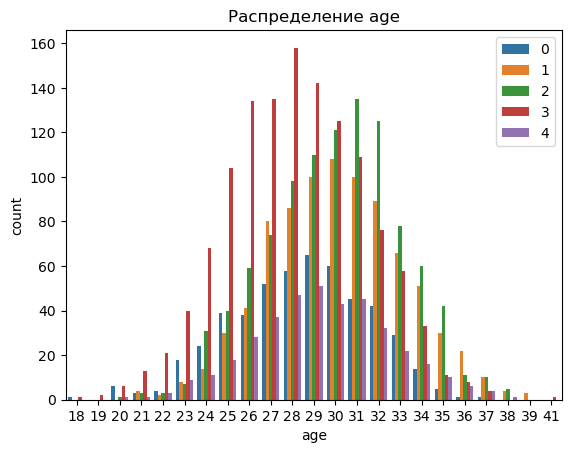

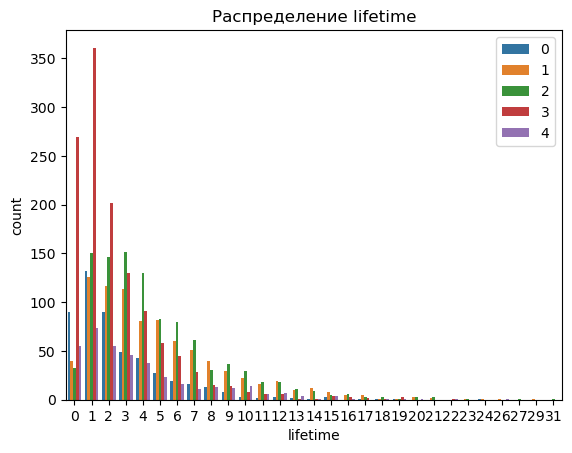

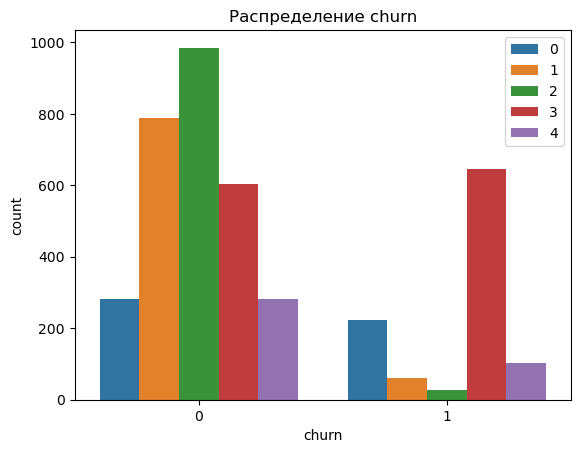

In [28]:
for priznak in categorial_priznak:
    sns.countplot(data = data,
                  x = priznak,
                  hue = 'number_of_cluster')
    plt.title(f'Распределение {priznak}')
    plt.legend()
    plt.show()

In [29]:
# Количесвенные признаки
float_priznaki = data_types[data_types['type'] == 'float64']['priznak']
float_priznaki

8          avg_additional_charges_total
9                 month_to_end_contract
11            avg_class_frequency_total
12    avg_class_frequency_current_month
Name: priznak, dtype: object

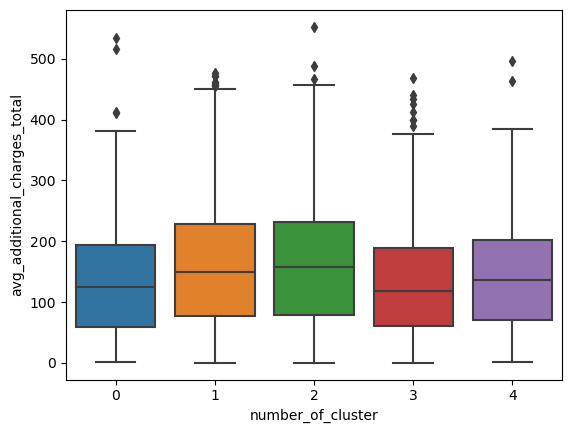

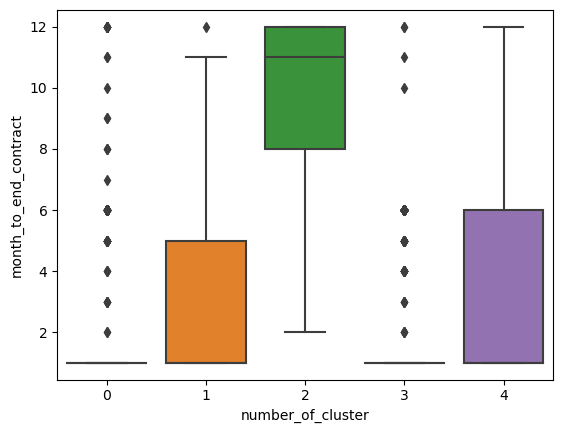

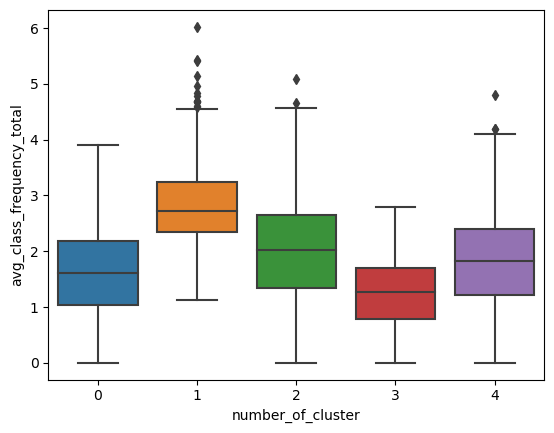

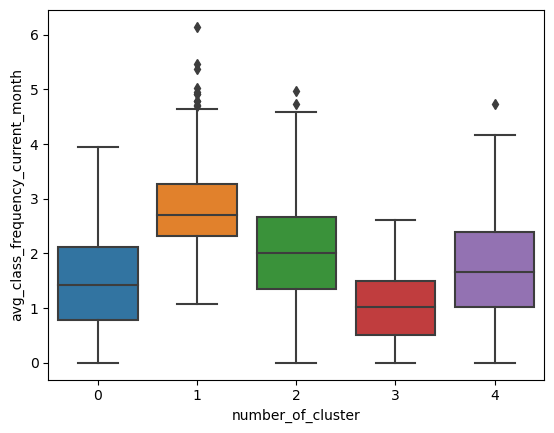

In [30]:
for priznak in float_priznaki:
    sns.boxplot(data = data,
                x = 'number_of_cluster',
                y = priznak)
    plt.show()

Выводы по категориальныим признакам: 

- кластер 3 состоит полностью из посетителей проживающих далеко от фитнесс-центра
- кластер 3 , в основном, состоит из посетителей, пришедших НЕ из акции "приведи друга" 
- кластер 0 единственный, кто не предоставлял телефон
- у кластеров 1, 3 длительность текущего действующего абонемента в основном - 1 месяц
- у кластера 4 длительность текущего действующего абонемента в основном - 12 месяцев
- в кластере 3, в основном, не пользуются групповыми занятиями
- в кластере 4 средний возраст чуть выше чем в остальных
- оттоку не подвержен кластер 2 и 4, у остальных кластеров показатели оттока и неоттока примерно одинаковые


Выводы по количественным признакам:

- суммарная выручка от других услуг фитнес-центра выше у кластеров 2, 4 (опять же, это из-за большего кол-ва посещений в неделю)
- у 1,3 кластеров до окончания абонемента - 1 месяц
- у 0,2 кластеров - больше всего посетителей с 1,6 месяцами (чем с 12 мес.) до окончания абонемента
- у 4 кластера в основном 12 мес. до окнчания абонемента
- чаще всего посещает фитнесс-центр - 2 и 4 кластер

---

<a id = 'stage_4_6'></a>

#### 4.6. Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

[к оглавлению](#title)

Text(0.5, 1.0, 'Гистограмма оттока посетителей по кластерам')

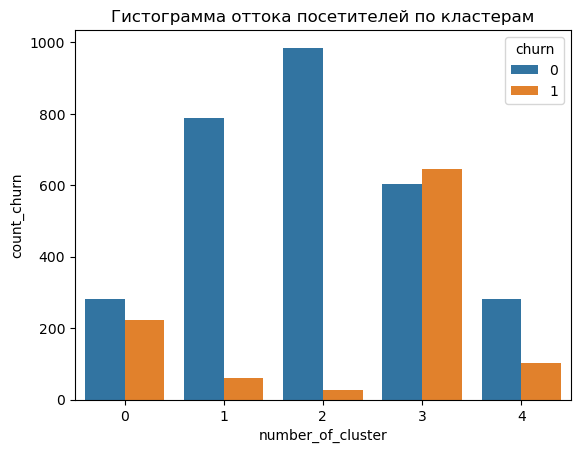

In [31]:
data_cluster_churn = \
data.groupby(['number_of_cluster','churn']).agg({'churn':'count'}).rename({'churn': 'count_churn'}, axis=1).reset_index()

sns.barplot(data=data_cluster_churn,
            x = 'number_of_cluster',
            y = 'count_churn',
            hue = 'churn')

plt.title('Гистограмма оттока посетителей по кластерам')

In [32]:
data_cluster_count = \
data['number_of_cluster'].value_counts().reset_index()

data_churn_cluster = \
data_cluster_churn.merge(data_cluster_count,
                         on = 'number_of_cluster')

data_churn_cluster['dolya (%)'] = (data_churn_cluster['count_churn'] / data_churn_cluster['count'])*100
data_churn_cluster.round(2)

,number_of_cluster,churn,count_churn,count,dolya (%)
0,0,0,281,505,55.64
1,0,1,224,505,44.36
2,1,0,787,848,92.81
3,1,1,61,848,7.19
4,2,0,985,1013,97.24
5,2,1,28,1013,2.76
6,3,0,604,1249,48.36
7,3,1,645,1249,51.64
8,4,0,282,385,73.25
9,4,1,103,385,26.75


Text(0, 0.5, 'доля (%)')

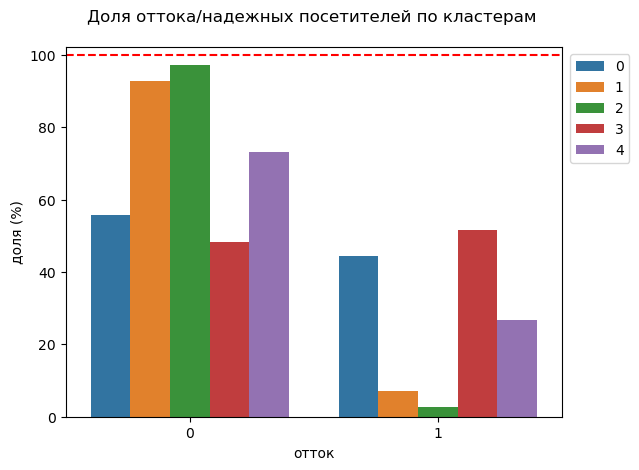

In [33]:
ax =\
sns.barplot(data = data_churn_cluster,
            x = 'churn',
            y = 'dolya (%)',
            hue='number_of_cluster')
plt.axhline(y = 100,
            linestyle = '--',
            color = 'red')
ax.legend(bbox_to_anchor = (1.15, 1),
          loc = 'upper right')
plt.title('Доля оттока/надежных посетителей по кластерам \n')
plt.xlabel('отток')
plt.ylabel('доля (%)')

Склонные к оттоку кластеры - 0, 1, 4
Не склонные к оттоку - 2, 3

<a id = 'stage_5'></a>

# Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

[к оглавлению](#title)

- необходимо удержание надежных кластеров (бонусы и преференции за частое посещение или длитеотные абонементы)
- предсказание оттока, путем ежемесячной аналитики посетителей
- не надежным кластерам предоставить предложения по уменьшению оттока (максимальному удержанию кластера, уменьшению доли оттока)